In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()


## Example: Lollipop charts
In practice you will find yourself combining many of these techniques. The process of creating high-quality visuals is iterative and somewhat artistic -- there is no "one right answer". In the last few slides, I want to give you some intuition for how such a process might unfold.

In [13]:
data(midwest)
midwest %>% print

# A tibble: 437 x 28
     PID county state  area poptotal popdensity popwhite popblack popamerindian
   <int> <chr>  <chr> <dbl>    <int>      <dbl>    <int>    <int>         <int>
 1   561 ADAMS  IL    0.052    66090      1271.    63917     1702            98
 2   562 ALEXA… IL    0.014    10626       759      7054     3496            19
 3   563 BOND   IL    0.022    14991       681.    14477      429            35
 4   564 BOONE  IL    0.017    30806      1812.    29344      127            46
 5   565 BROWN  IL    0.018     5836       324.     5264      547            14
 6   566 BUREAU IL    0.05     35688       714.    35157       50            65
 7   567 CALHO… IL    0.017     5322       313.     5298        1             8
 8   568 CARRO… IL    0.027    16805       622.    16519      111            30
 9   569 CASS   IL    0.024    13437       560.    13384       16             8
10   570 CHAMP… IL    0.058   173025      2983.   146506    16559           331
# ... with 427 more

In [3]:
midwest_top25 = midwest %>% select(county, state, percollege) %>% 
                            arrange(desc(percollege)) %>% top_n(25)
print(midwest_top25)

Warning message:
“package ‘bindrcpp’ was built under R version 3.4.4”Selecting by percollege


# A tibble: 25 x 3
   county    state percollege
   <chr>     <chr>      <dbl>
 1 WASHTENAW MI          48.1
 2 DANE      WI          43.6
 3 DU PAGE   IL          42.8
 4 HAMILTON  IN          42.1
 5 CHAMPAIGN IL          41.3
 6 LAKE      IL          37.8
 7 MONROE    IN          37.7
 8 OZAUKEE   WI          37.4
 9 OAKLAND   MI          37.0
10 INGHAM    MI          36.8
# ... with 15 more rows


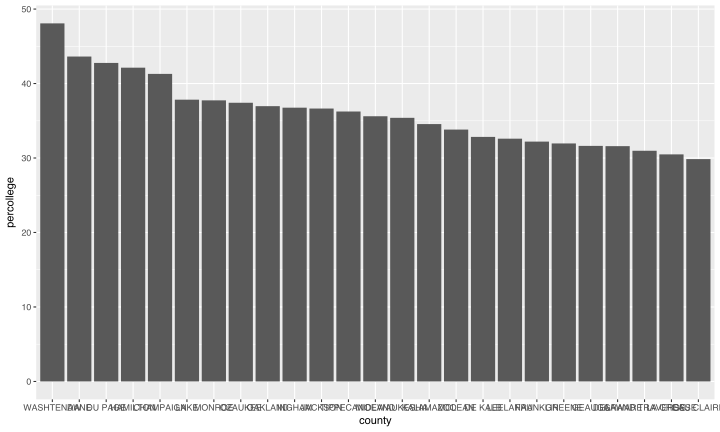

In [15]:
(p = ggplot(midwest_top25, aes(x=county, y=percollege)) + geom_bar(stat="identity"))

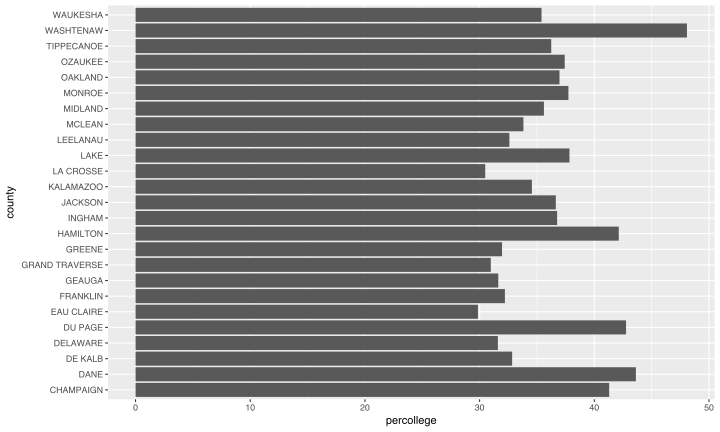

In [5]:
(p = p + coord_flip())

In [17]:
midwest_top25 = midwest_top25 %>% mutate(county = factor(county, levels = .$county))
print(midwest_top25$county)

 [1] WASHTENAW      DANE           DU PAGE        HAMILTON       CHAMPAIGN     
 [6] LAKE           MONROE         OZAUKEE        OAKLAND        INGHAM        
[11] JACKSON        TIPPECANOE     MIDLAND        WAUKESHA       KALAMAZOO     
[16] MCLEAN         DE KALB        LEELANAU       FRANKLIN       GREENE        
[21] GEAUGA         DELAWARE       GRAND TRAVERSE LA CROSSE      EAU CLAIRE    
25 Levels: WASHTENAW DANE DU PAGE HAMILTON CHAMPAIGN LAKE MONROE ... EAU CLAIRE


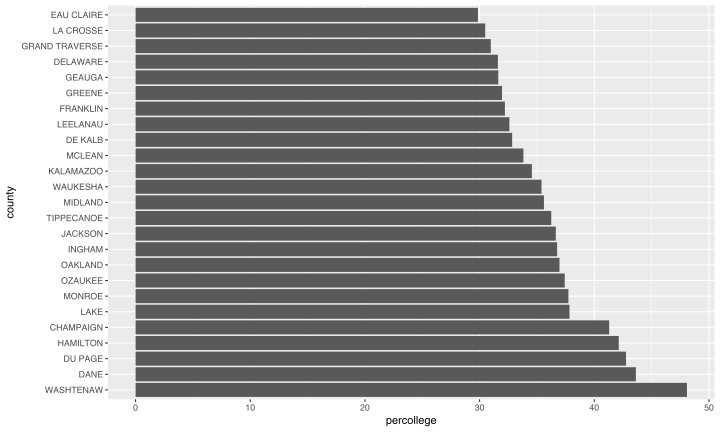

In [7]:
(p = ggplot(midwest_top25, aes(x=county, y=percollege)) + geom_bar(stat="identity") + coord_flip())

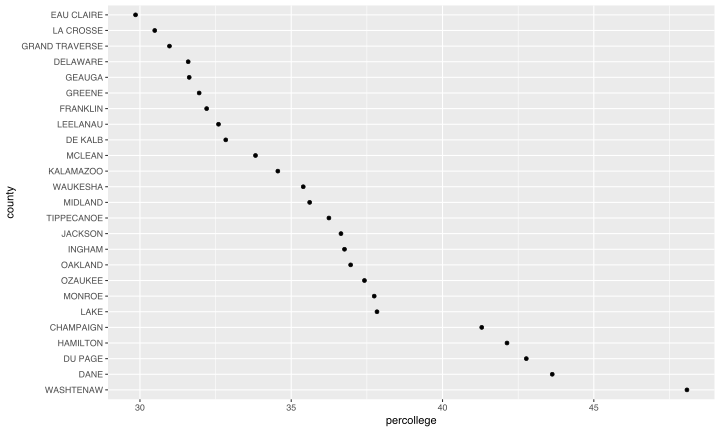

In [8]:
(p = ggplot(midwest_top25, aes(x=county, y=percollege)) + geom_point() + coord_flip())

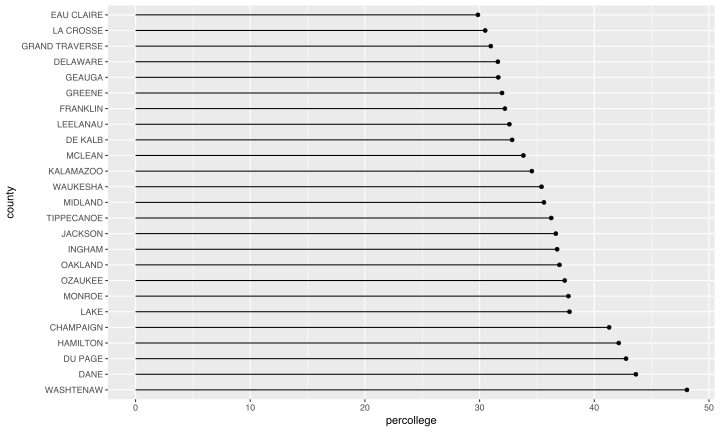

In [9]:
p + geom_segment(aes(y=0, yend=percollege, x=county, xend=county))

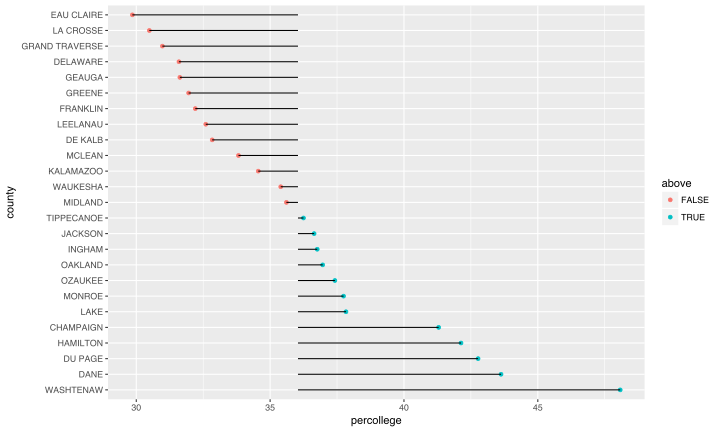

In [10]:
mu = mean(midwest_top25$percollege)
midwest_top25 = midwest_top25 %>% mutate(above=percollege > mu)
p = ggplot(midwest_top25, aes(x=county, y=percollege)) + geom_point(aes(color=above)) + 
    coord_flip() + geom_segment(aes(y=mu, yend=percollege, x=county, xend=county))
p

In [11]:
p + theme_tufte() + ggtitle("College education by county") + 
                    ylab("% College Educated") + xlab("County")

ERROR: Error in theme_tufte(): could not find function "theme_tufte"
